<h1>A Study of COVID-19 Cases</h1>
<h2>Objective of Experiment</h2>
The goal and objective of this experiment is to look at and compare results of SARS-COVID-2 across multiple countries and across each state. The data for this experiment comes from the John Hopkins University data repository, which gathers data from seven different sources and allows for it to be studied. This journal will try to compare this data not only to show the difference of how each government handled the virus, but to previous pandemics and the influenza.

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import glob
import us

import copy
import random

import matplotlib
import matplotlib.pyplot as plt

import time
%matplotlib inline

<h2>Data File Location and Extraction</h2>
Set location of data for cases collected by WHO for cases and deaths worldwide as well as data that has been collected for the United States. Goal will be to observe and compare the differences amongst a group of 10 countries (United States, Japan, China, Germany, South Korea, England, Spain, Italy, Iran, and Switzerland) to each other and compare each state. The goal is to have a visible representation of the effects of the virus and compare how it has been handled across different governments with the amount of time they had to react. To pull and use the data that will be displayed in the following sections, please see README for the John Hopkins University data repository.

<h3>Extracting Data</h3>
Based on the project setup, regardless of location of project folder, the data should exist in a folder cloned from the John Hopkins repository. Once this data is available, the system will concat all the US data and global data from WHO up to the last date that it was updated. The first twenty-five rows of both data sets are provided for viewing, and verification that everything is correctly setup.

In [2]:
dataUSPath=r'COVID-19\csse_covid_19_data\csse_covid_19_time_series'
dataWHOPath=r'COVID-19\who_covid_19_situation_reports\who_covid_19_sit_rep_time_series\who_covid_19_sit_rep_time_series.csv'

curr_folder = os.path.dirname(os.path.abspath('COVID19DATA.ipynb'))

files = glob.glob(os.path.join(curr_folder, dataUSPath))
dataUSCases=pd.read_csv(dataUSPath + r'\time_series_covid19_confirmed_US.csv')
dataUSDeaths=pd.read_csv(dataUSPath + r'\time_series_covid19_deaths_US.csv')
dataWHO = pd.read_csv(os.path.join(curr_folder, dataWHOPath))

dataUSCases[0:25]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,301,303,307,309,310,310,310,312,312,313
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,31,31,31,31,31,33,33,33,36,36
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,8585,8714,8745,8862,9137,9366,9654,10010,10123,10379
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,112,116,122,144,153,167,181,206,206,243
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,610,636,643,653,662,676,698,715,733,743
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,894,980,1039,1114,1170,1207,1277,1341,1396,1499
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,353,357,362,367,377,394,399,402,413,426
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,194,196,198,208,215,221,224,227,232,238
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,243,251,258,273,281,296,320,331,344,367


In [3]:
dataUSDeaths[0:25]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,155,157,159,159,159,167,167,167,169,171
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,6,6,6,6,6,6,6,6,6,6
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,12,12,12,13,14,14,15,15,17,18
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9,9,9,10,11,11,11,11,11,12
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2,2,2,2,2,2,2,2,3,3
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1,1,1,1,1,1,1,1,2,2
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataWHO[0:25]

,Province/States,Country/Region,WHO region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,7145539.0,7273958.0,7410510.0,7553182.0,7690708.0,7823289.0,7941791.0,8061550.0,8242999.0,8385440.0
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,408025.0,413372.0,418294.0,423349.0,427630.0,431541.0,434796.0,440290.0,445535.0,450686.0
2,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,84641.0,84652.0,84659.0,84659.0,84729.0,84778.0,84823.0,84867.0,84903.0,84940.0
3,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,7060898.0,7189306.0,7325851.0,7468523.0,7605979.0,7738511.0,7856968.0,7976683.0,8158096.0,8300500.0
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0
5,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Hunan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Creating Methods for States</h2>
The following methods provided below will be used to create the plots that will be used to display the number of cases in the United States tracked since the 21st of Janurary.

In [128]:
def plotCasesByState(state=None):
    i=0;
    if(state==None):
        fig, axs = plt.subplots(6,10,figsize=(40,40))
        fig.suptitle('Number of Cases for SARS-COVID-2 By State')
        for state in us.states.STATES:
            data=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1)) 
            axs[int(int(state.fips)/10),int(state.fips)%10-1].plot(data)
            axs[int(int(state.fips)/10),int(state.fips)%10-1].set_title(state.name)
        for ax in axs.flat:
            ax.set(xlabel='Day of SARS-COVID-2',ylabel='Number of Cases for SARS-COVID-2')
        states = us.states.STATES
        data=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
        plt.title(state)
        plt.ylabel('Number of Cases for SARS-COVID-2')
        plt.xlabel('Day of SARS-COVID-2')
        plt.plot(data)
        
    plt.show()

In [67]:
def plotDeathsByState(state=None):
    plt.figure(figsize=(10,6))
    if(state==None):
        for state in us.states.STATES:
            data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
            plt.figure()
            plt.title(state)
            plt.ylabel('Number of Deaths for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
    else:
        data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
        plt.title(state)
        plt.ylabel('Mortality Rate for SARS-COVID-2')
        plt.xlabel('Day of SARS-COVID-2')
        plt.plot(data)
        
    plt.show()

In [69]:
def plotRateOfDeathsByState(state=None):
    plt.figure(figsize=(10,6))
    if(state==None):
        for state in us.states.STATES:
            data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))/np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
            plt.figure()
            plt.title(state)
            plt.ylabel('Mortality Rate for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
    else:
        data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))/np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
        plt.title(state)
        plt.ylabel('Mortality Rate for SARS-COVID-2')
        plt.xlabel('Day of SARS-COVID-2')
        plt.plot(data)

<h2>Graphing Results</h2>
The following sections will contain the graphs based on the data provided by Johns Hopkins University. The first set show the number of cases, deaths, and rate of mortality in the United States as we have gotten further into the pandemic. After each section I will comment on some of the key states that have been of media publicity: Georgia, Florida, Arizona, New York, Texas, Washington, and California.

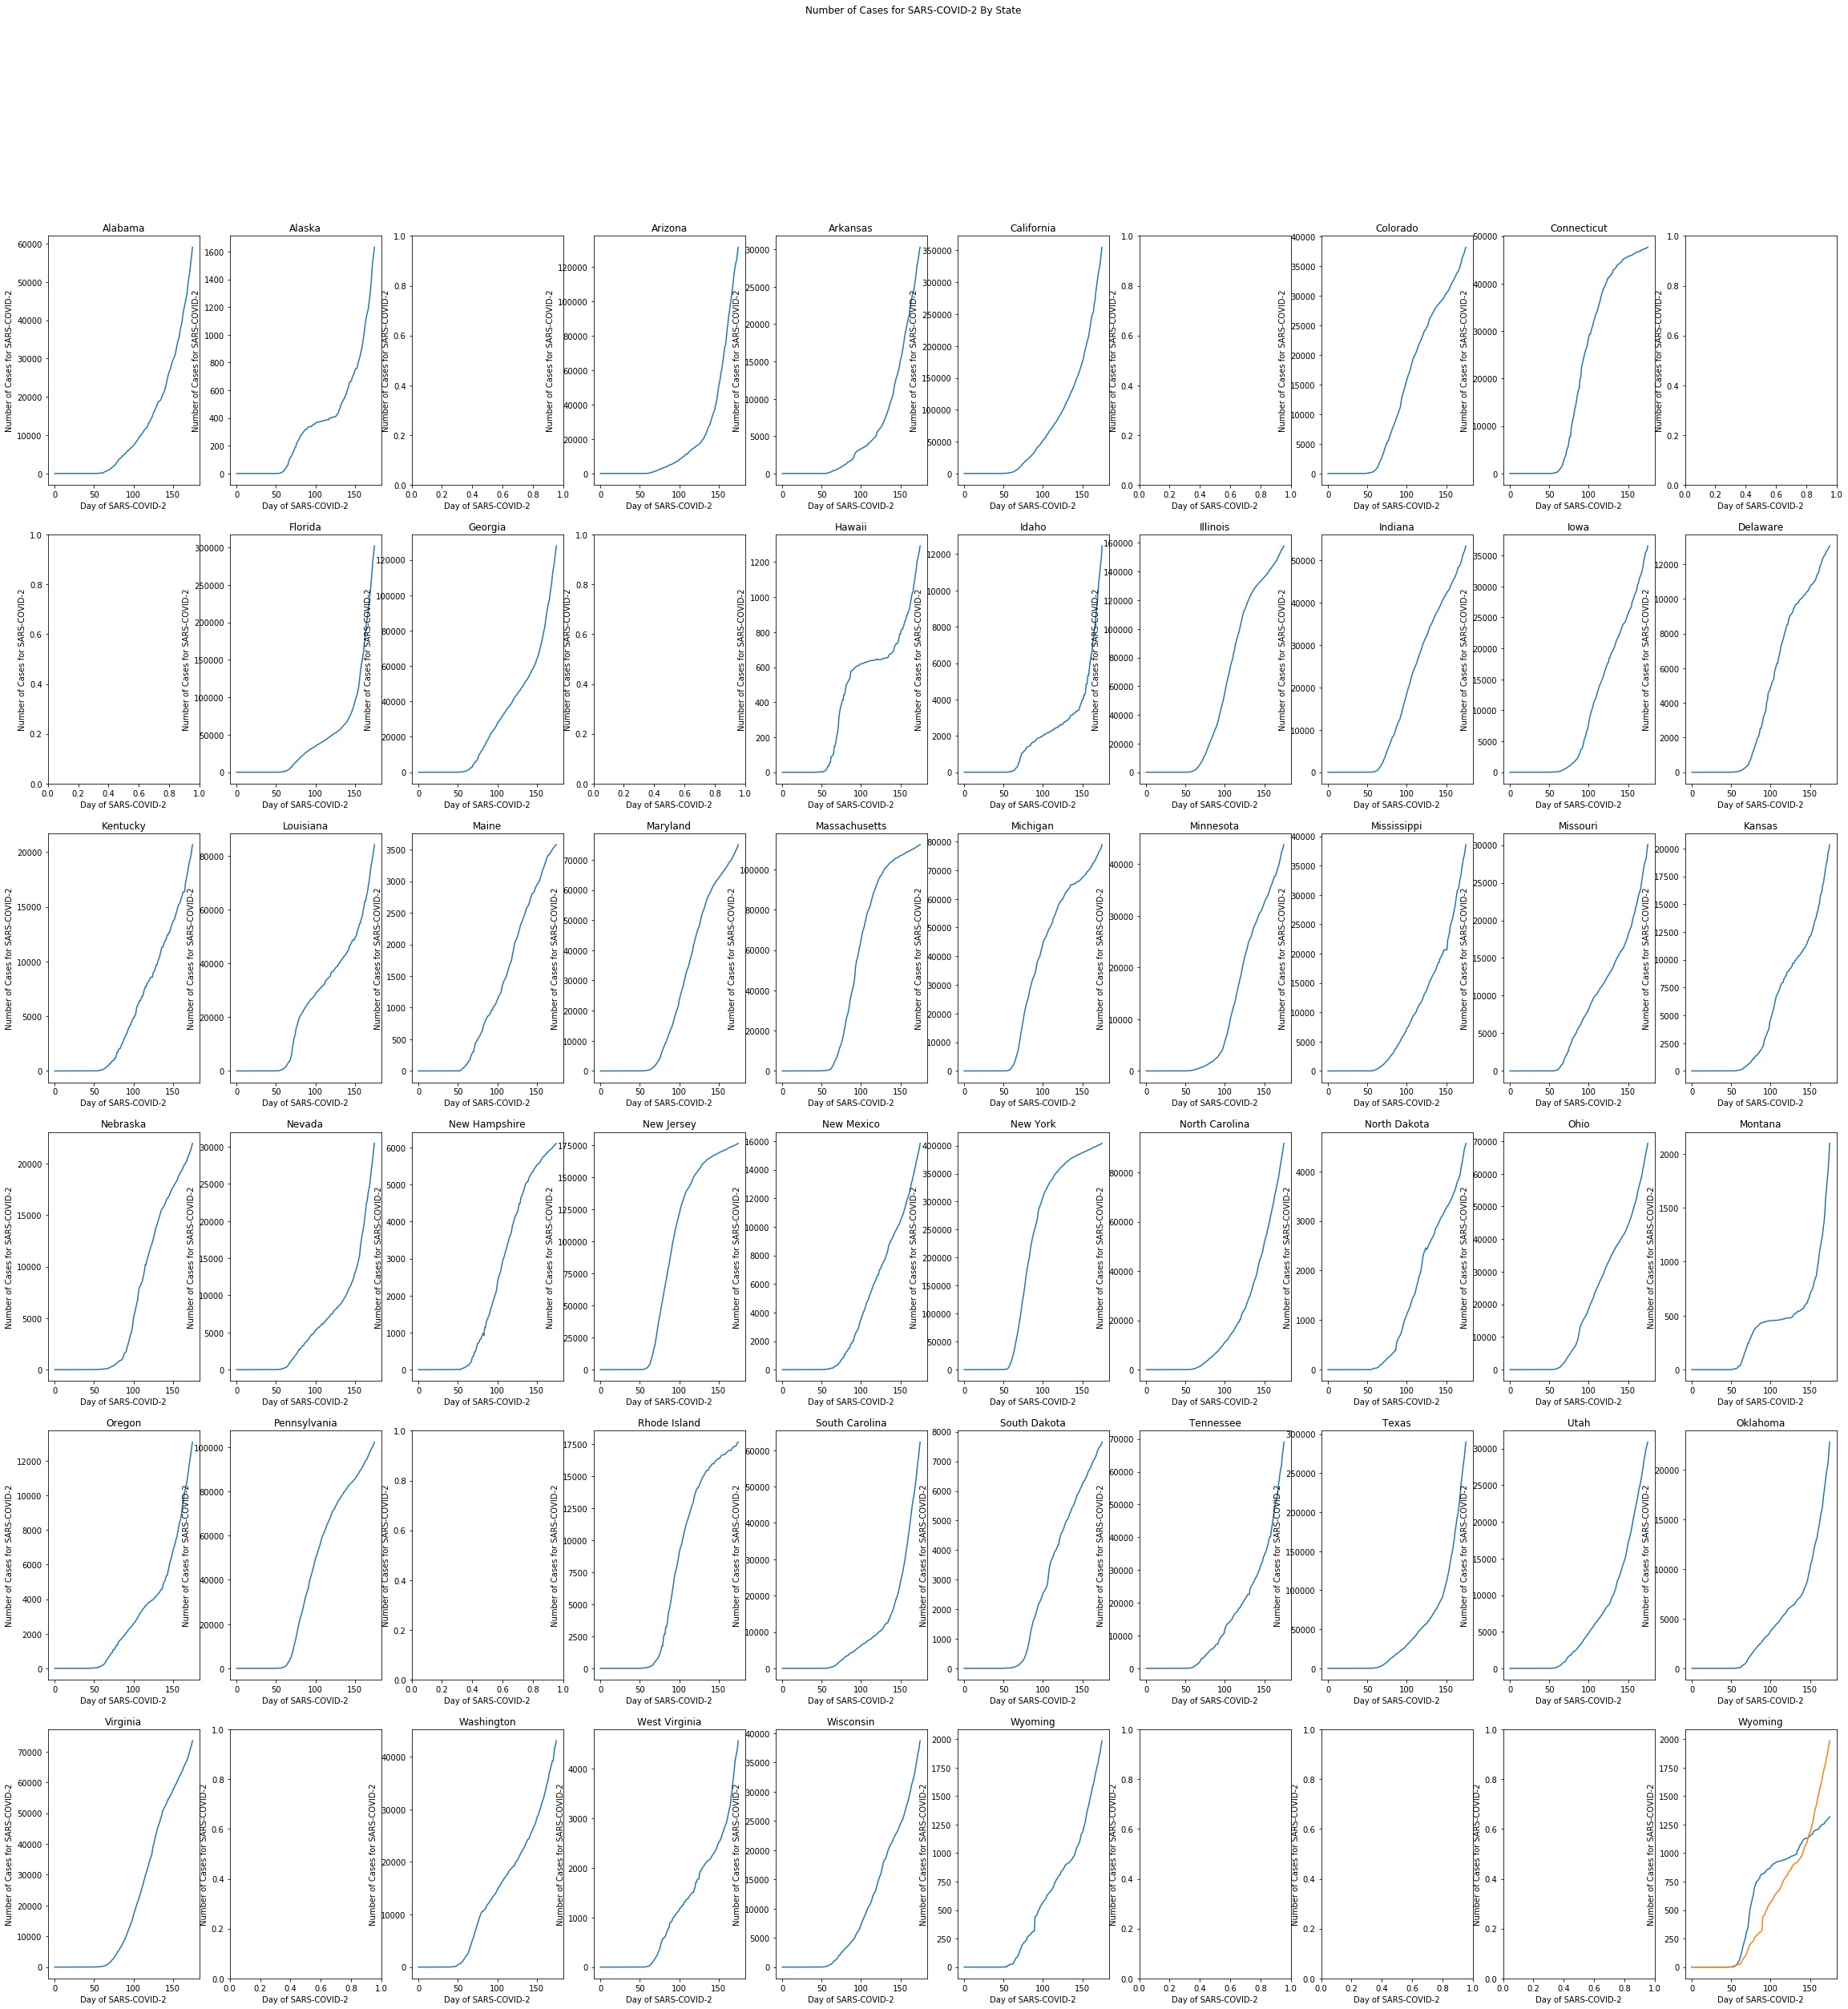

In [129]:
plotCasesByState()

In [119]:
state=us.states.WY
int(int(state.fips)/10),int(state.fips)%10-1

(5, 5)

<Figure size 720x432 with 0 Axes>

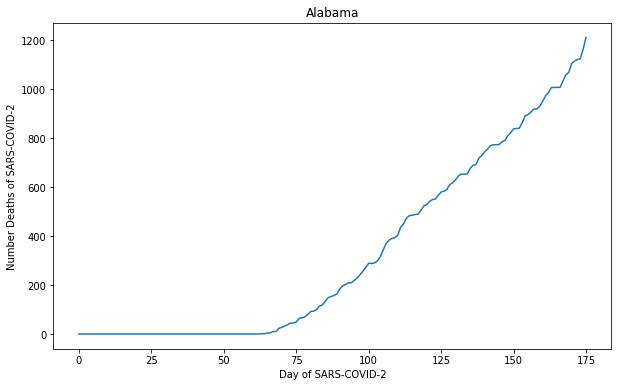

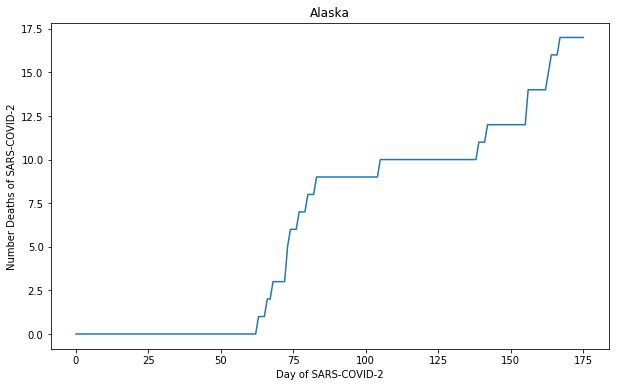

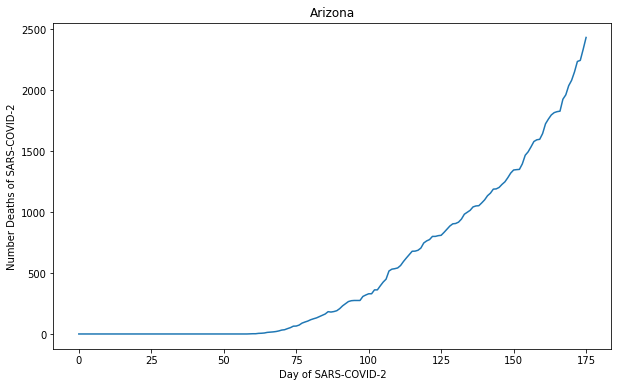

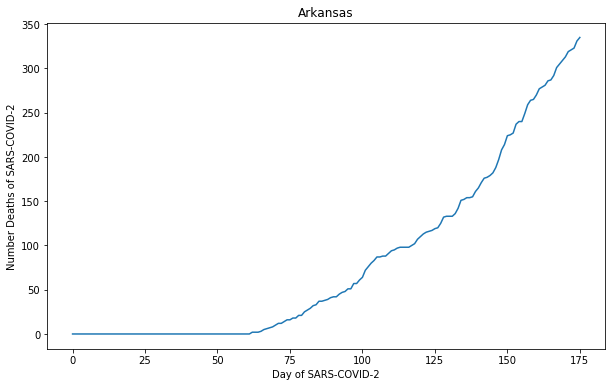

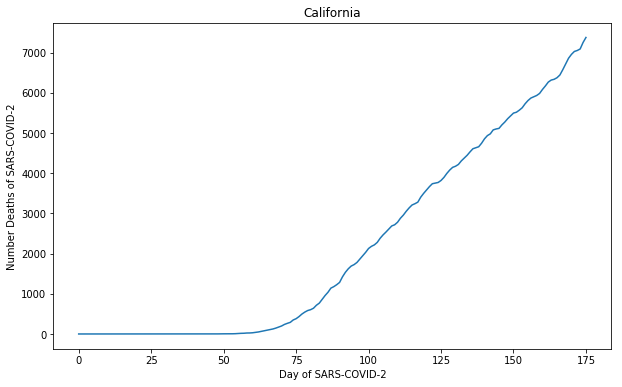

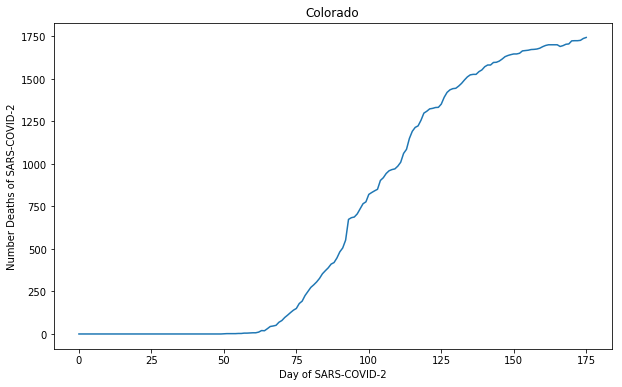

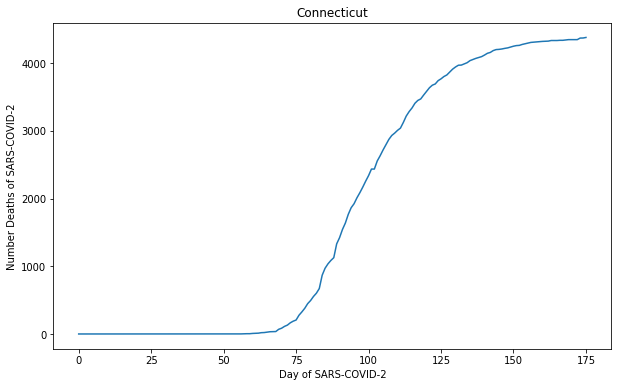

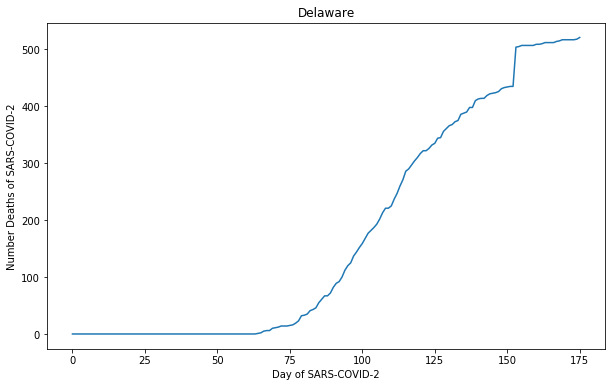

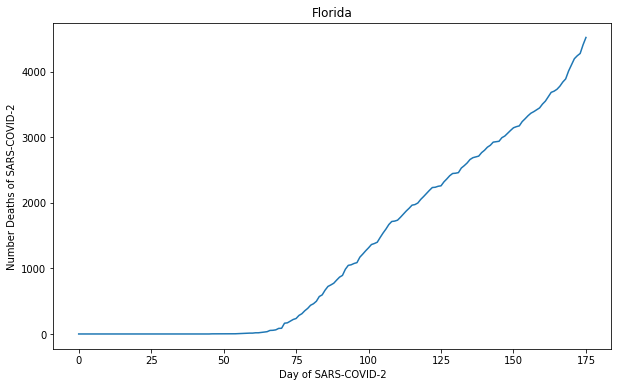

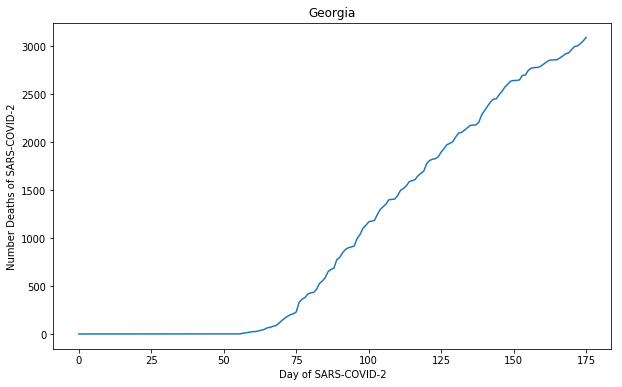

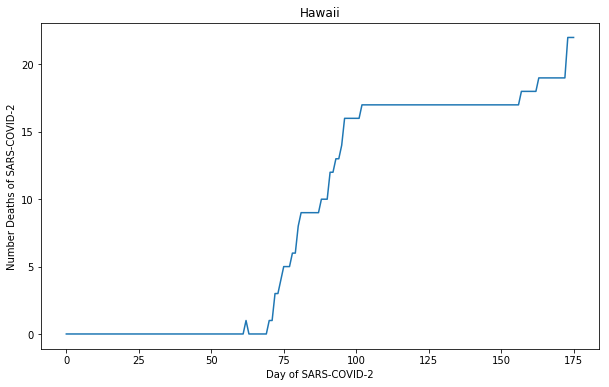

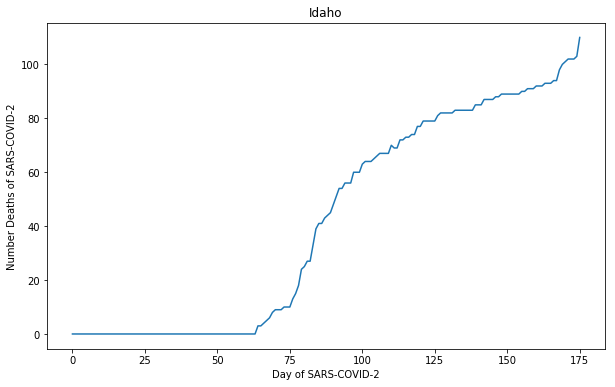

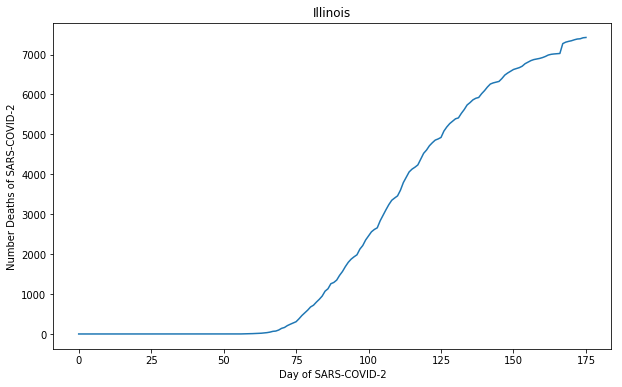

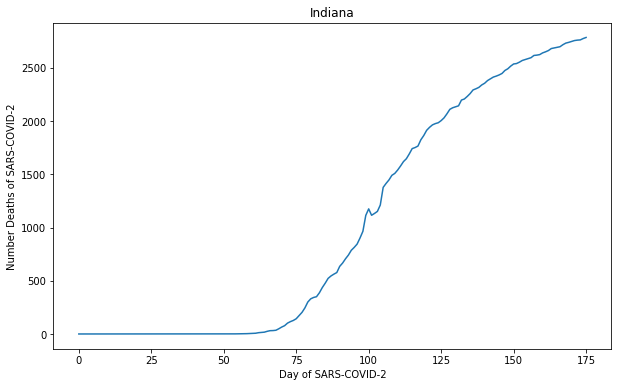

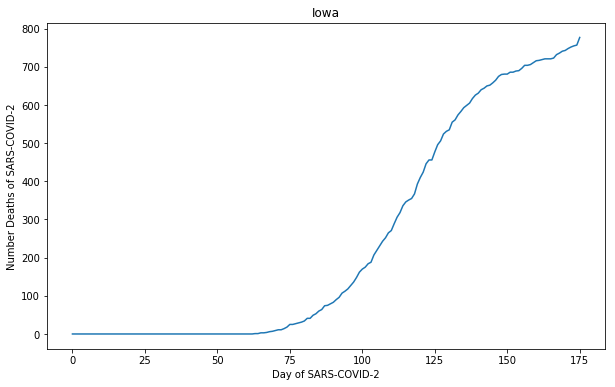

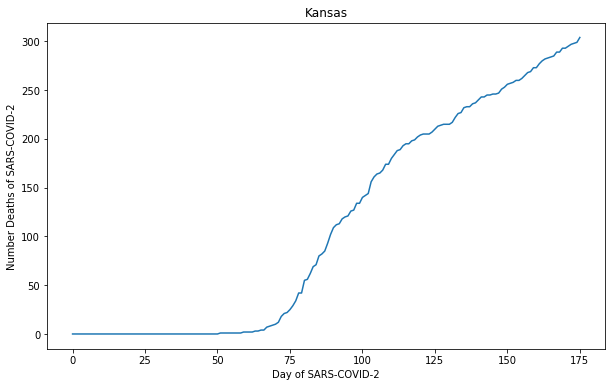

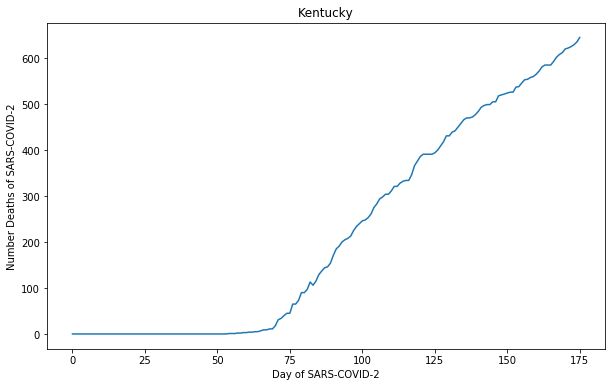

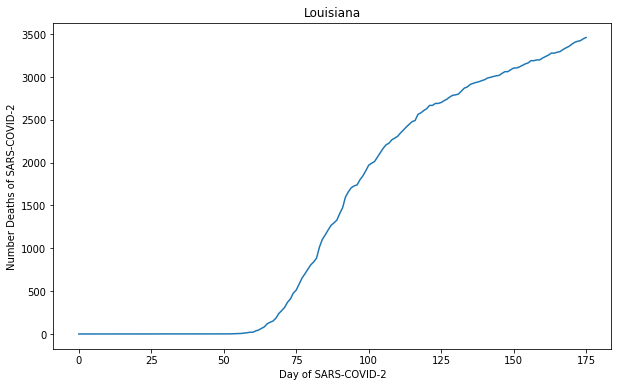

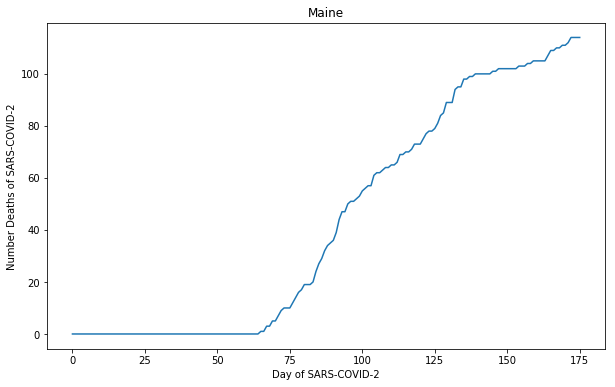

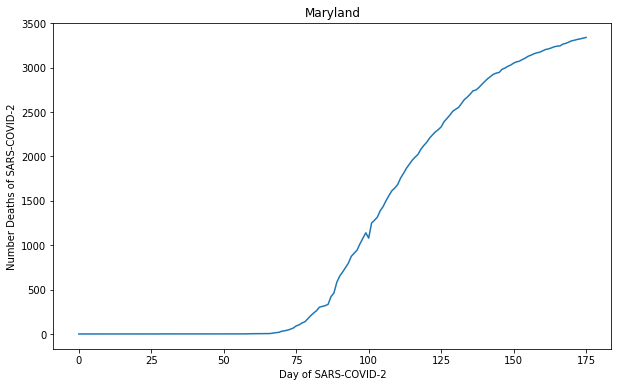

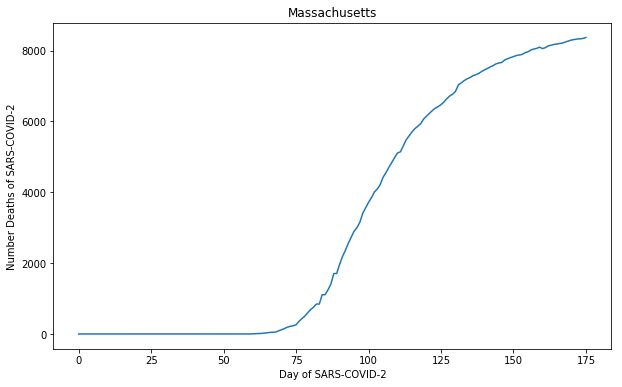

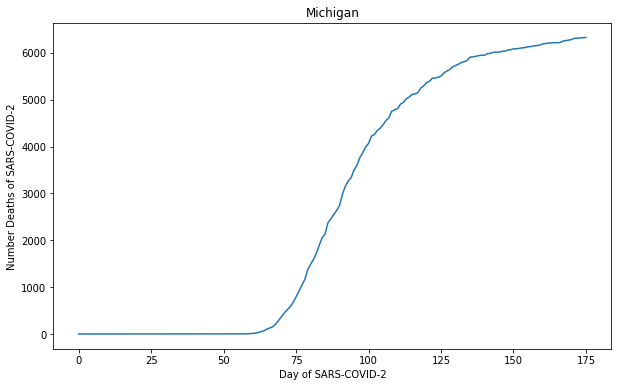

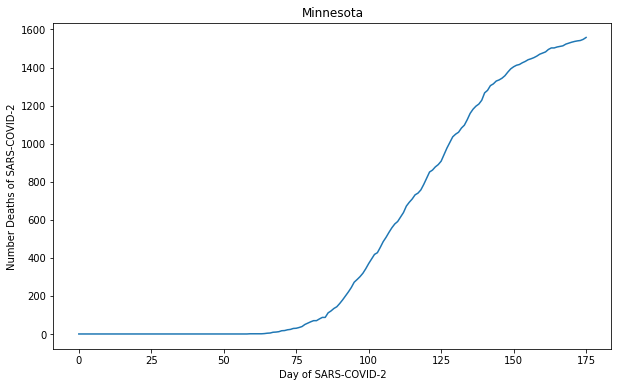

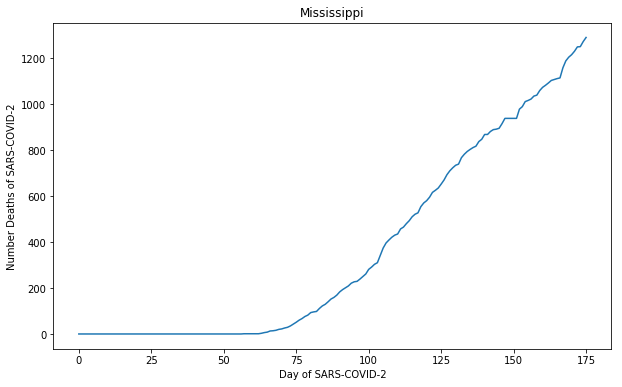

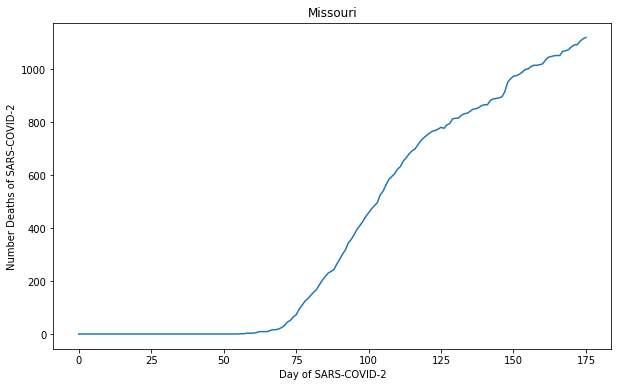

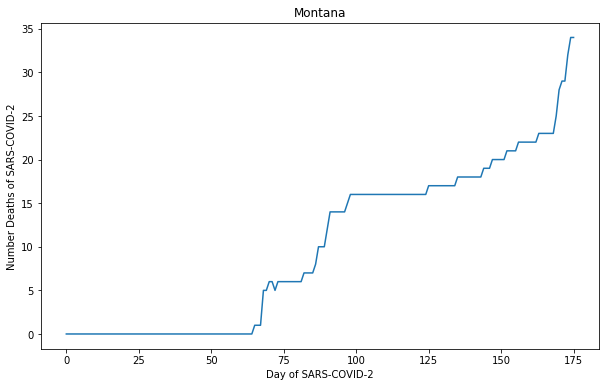

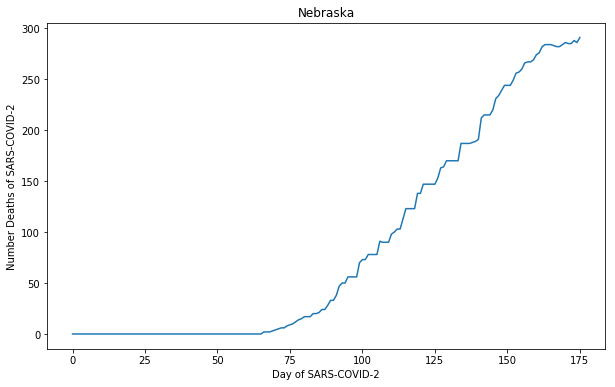

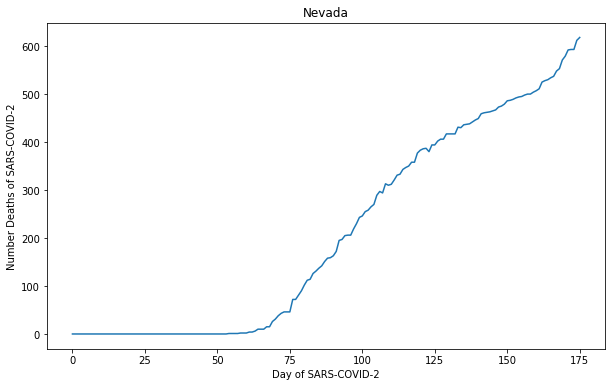

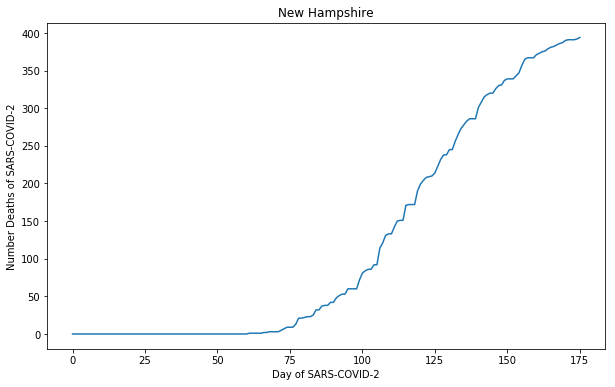

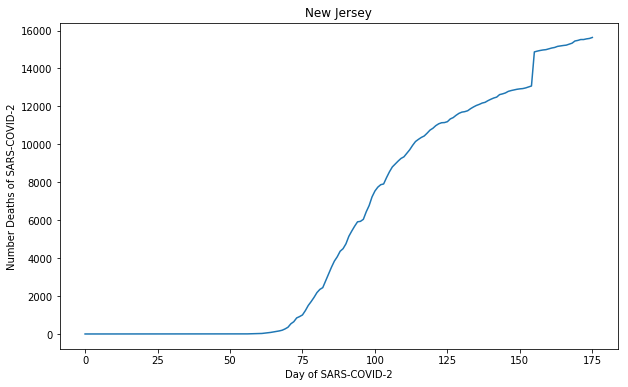

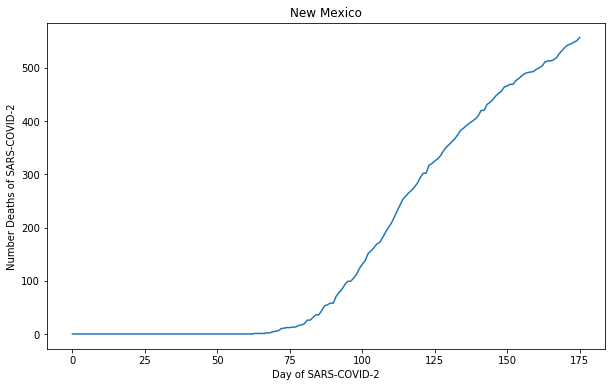

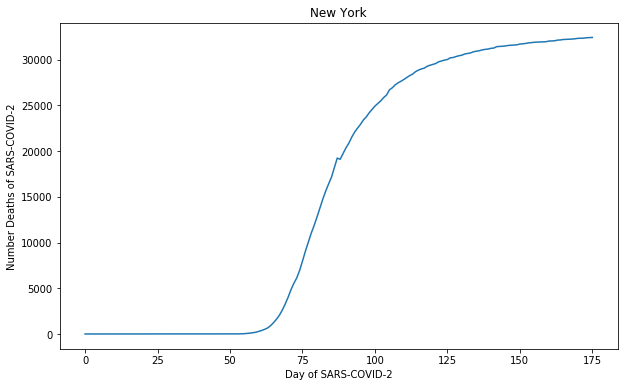

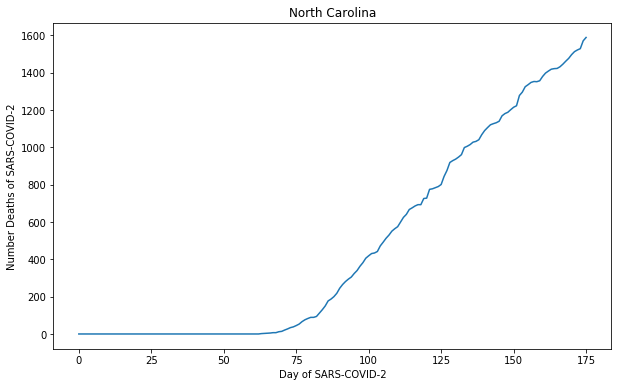

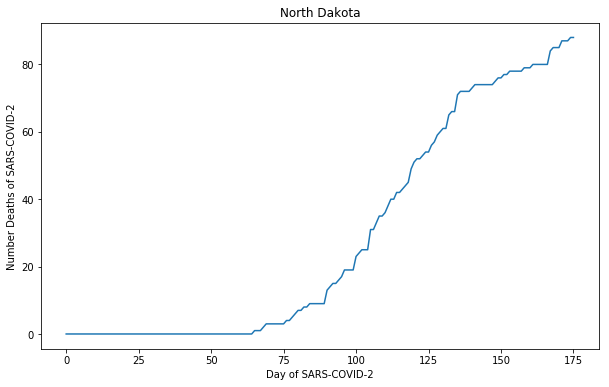

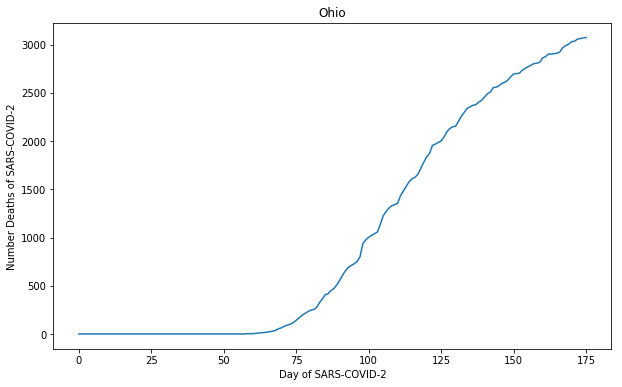

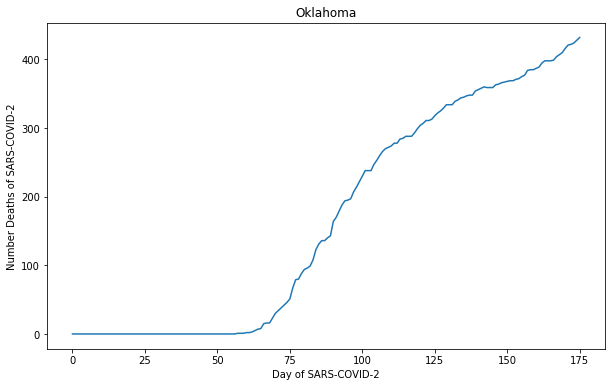

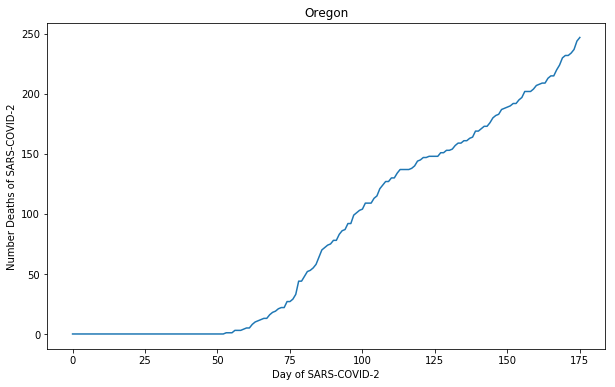

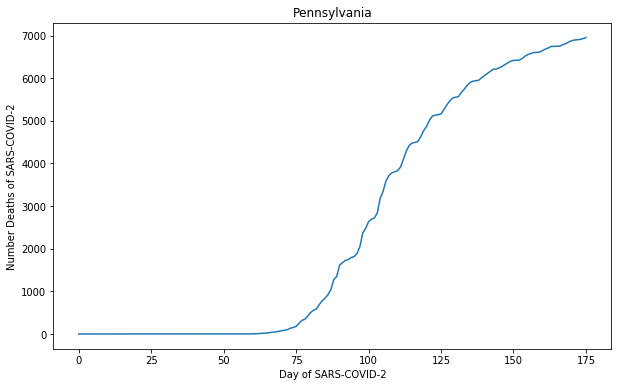

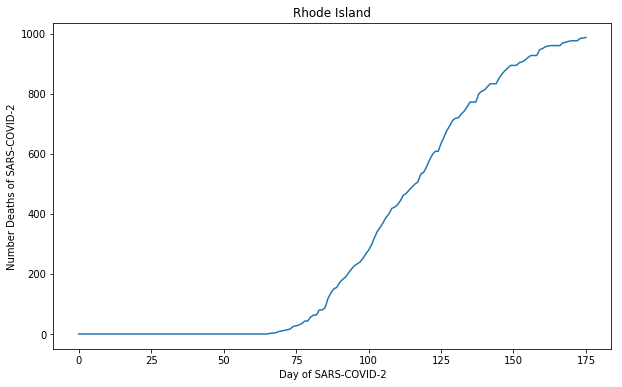

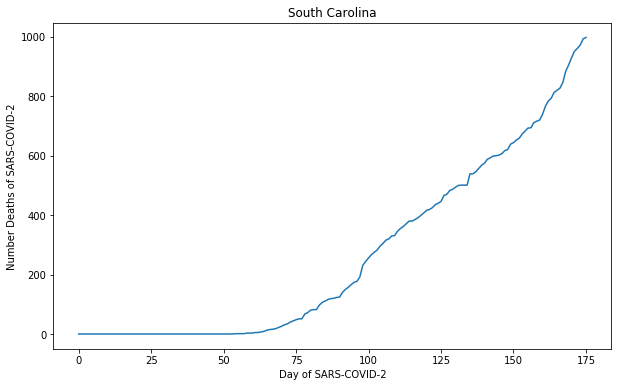

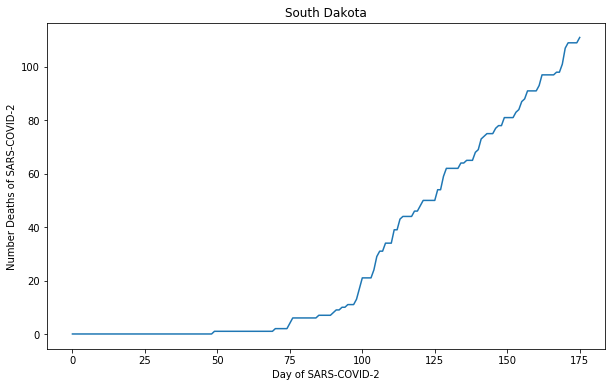

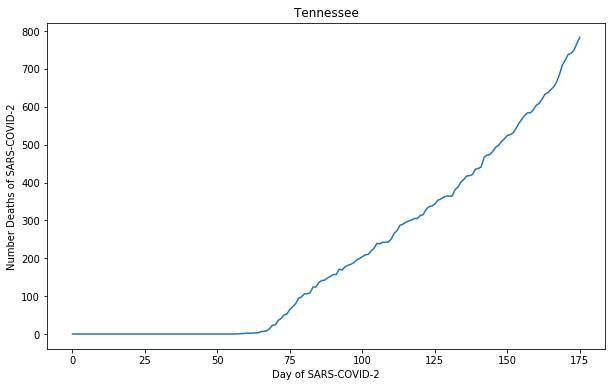

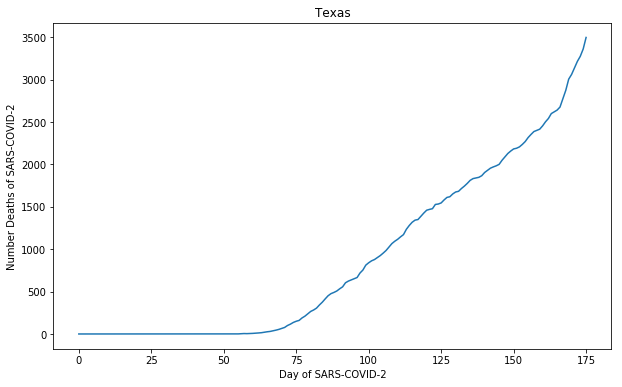

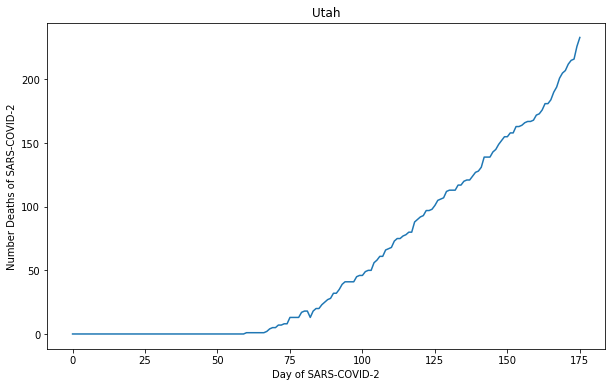

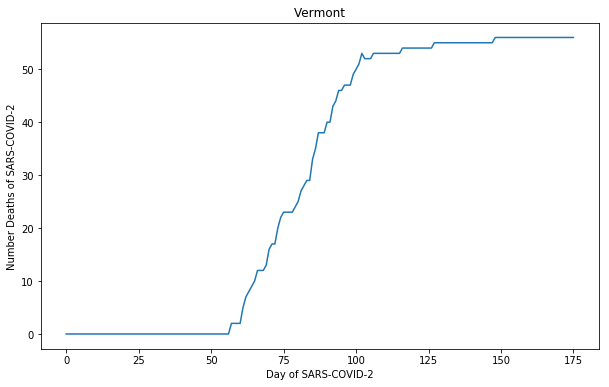

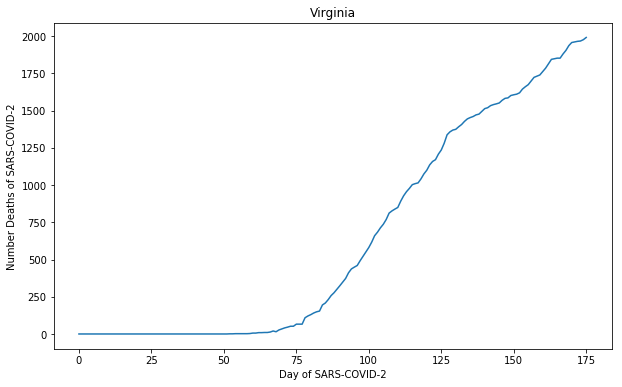

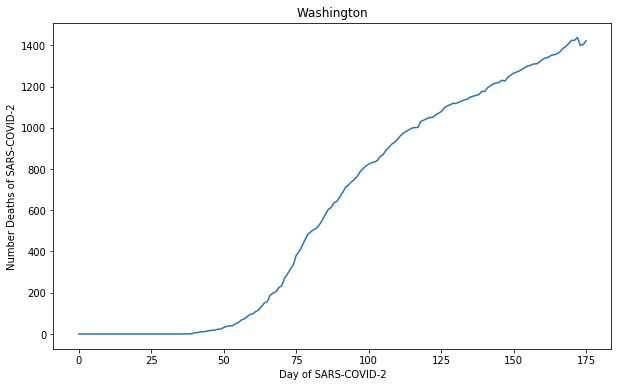

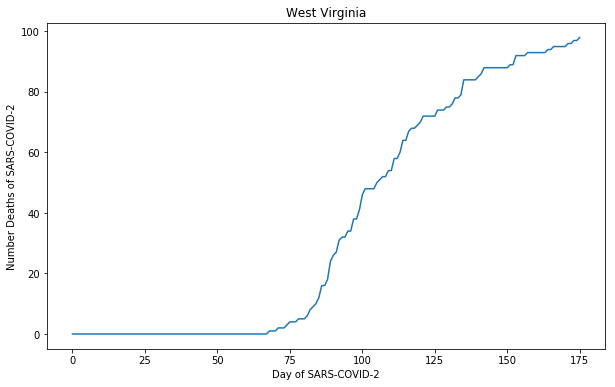

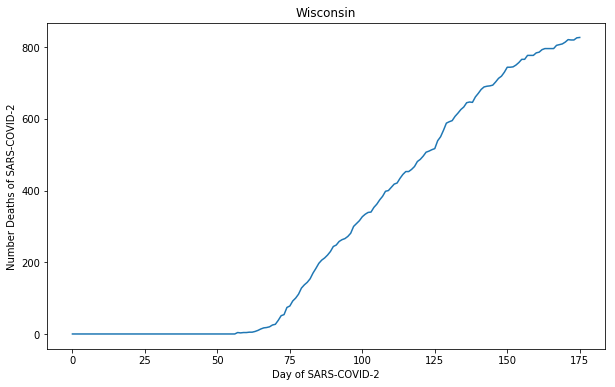

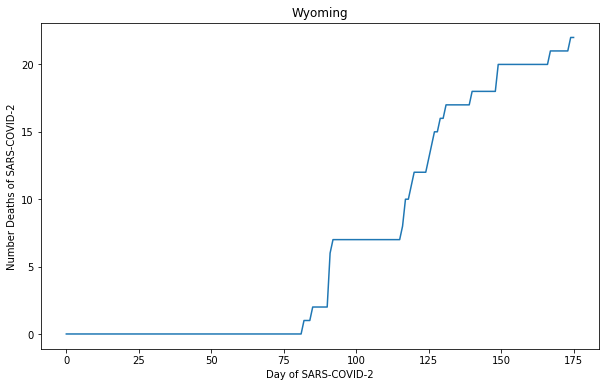

In [66]:
plotDeathsByState()

C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<Figure size 720x432 with 0 Axes>

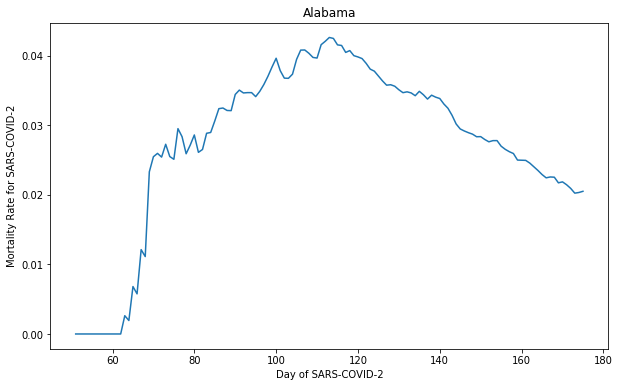

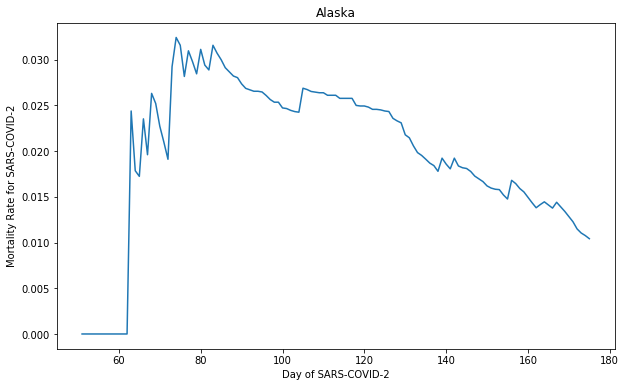

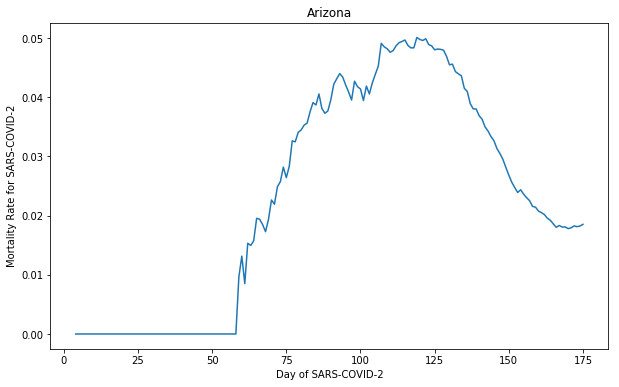

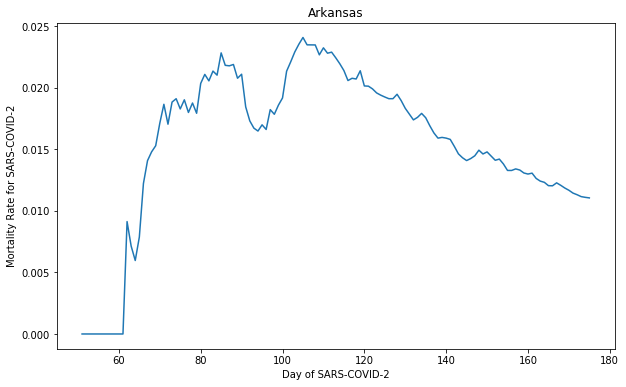

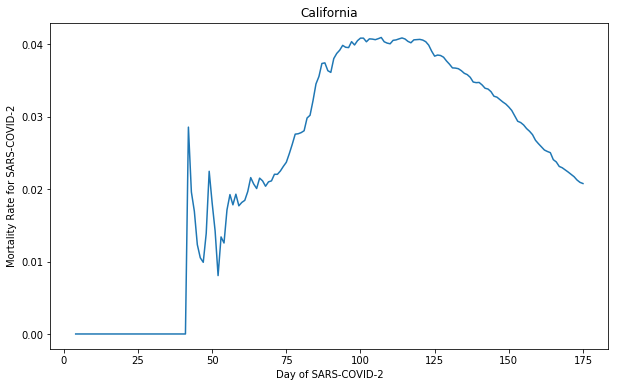

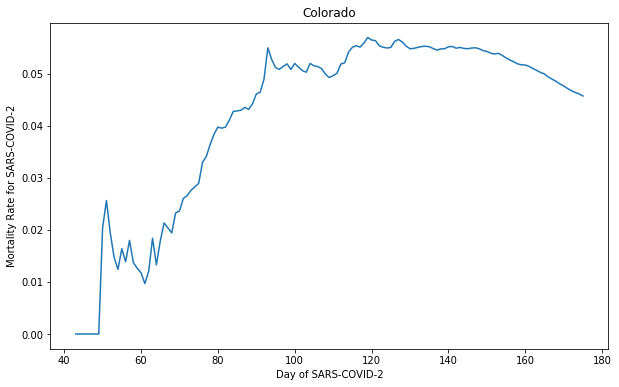

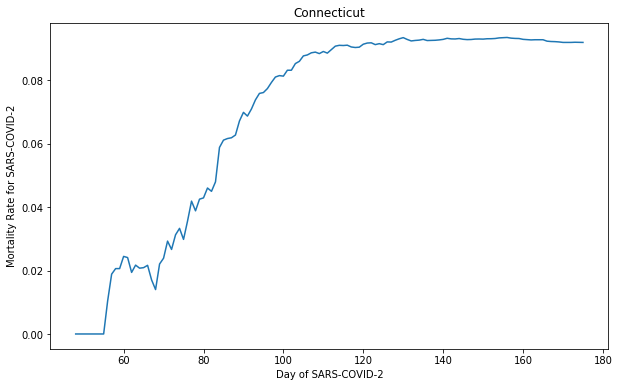

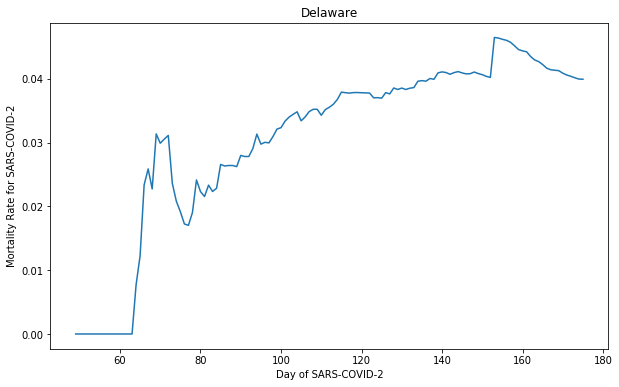

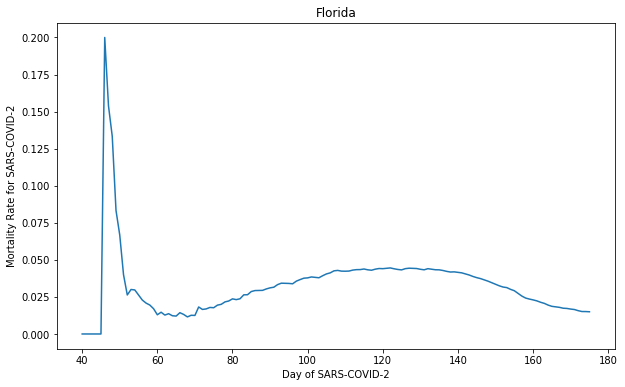

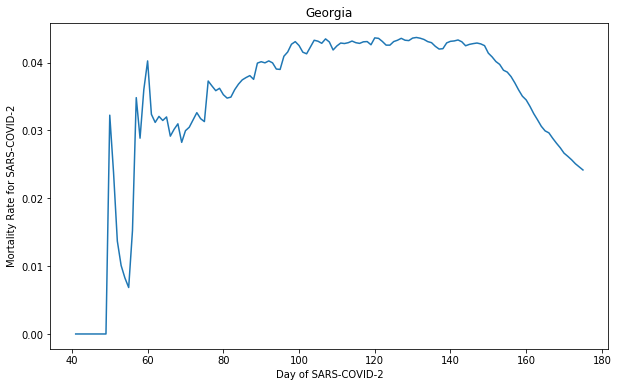

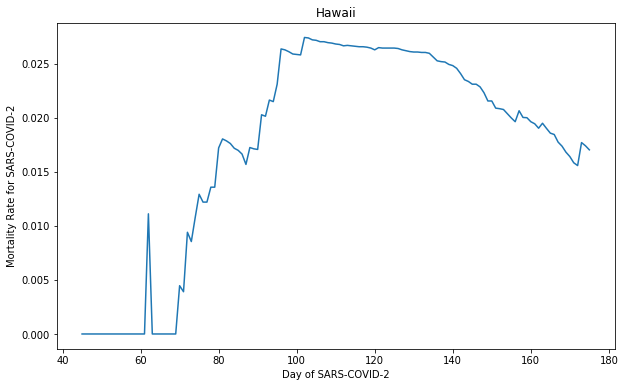

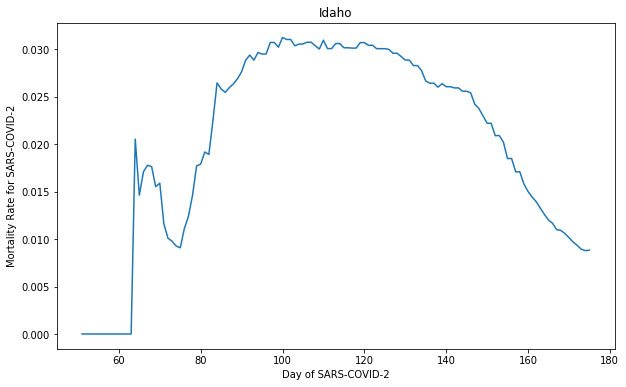

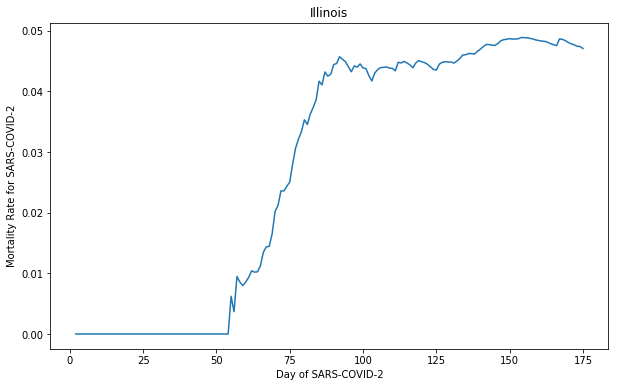

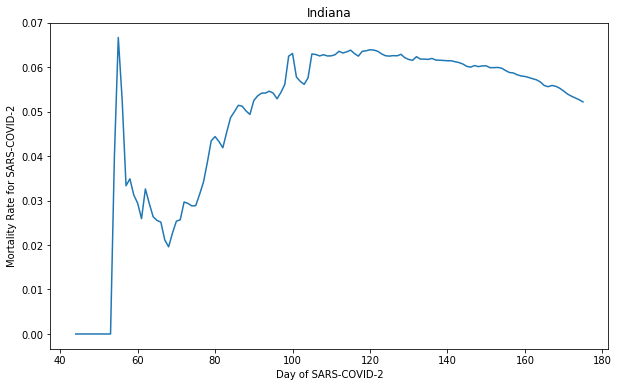

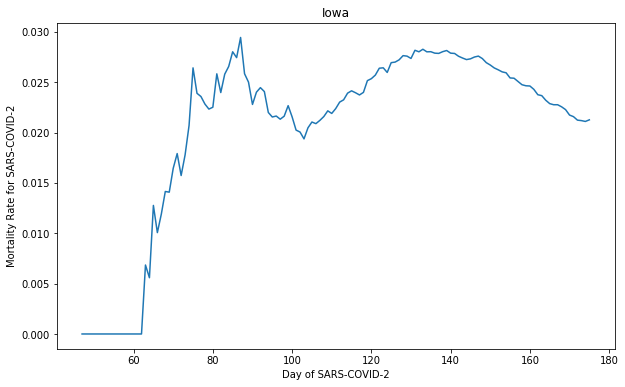

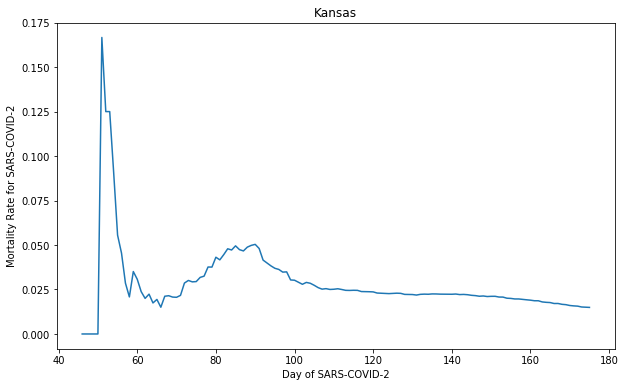

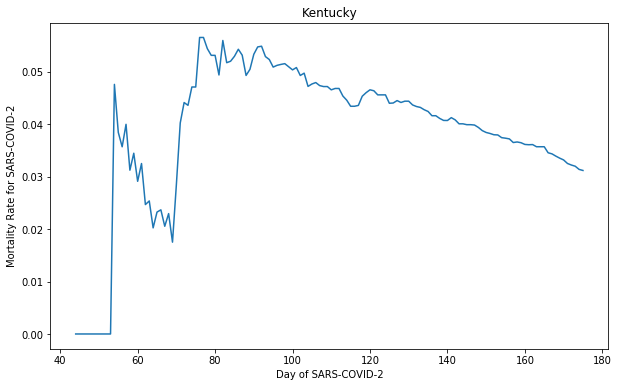

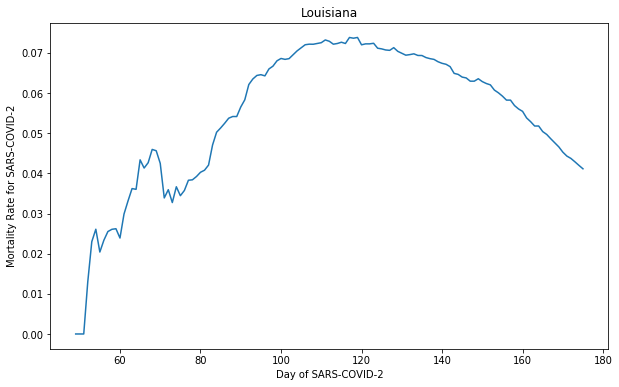

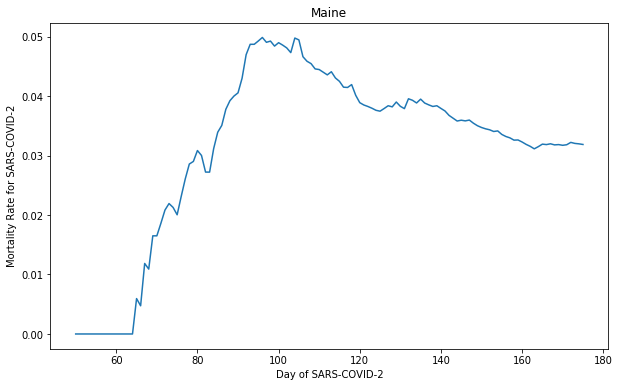

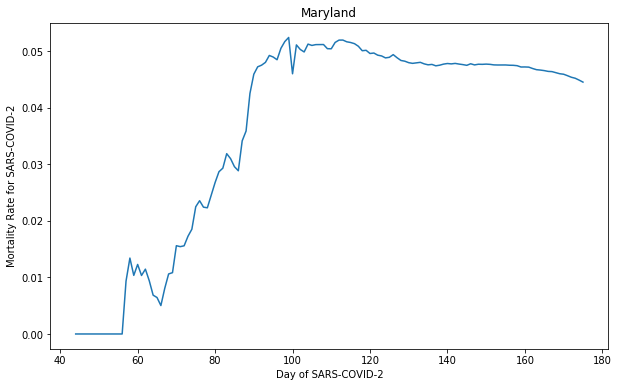

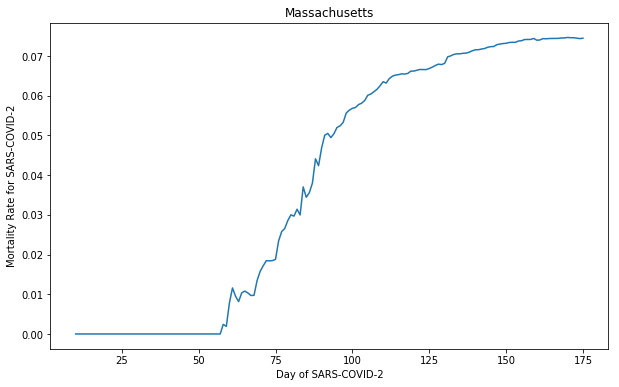

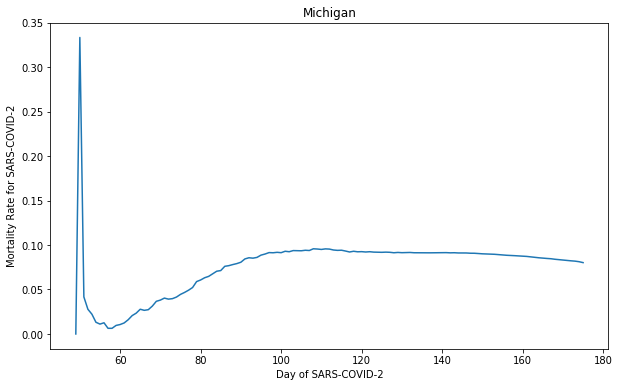

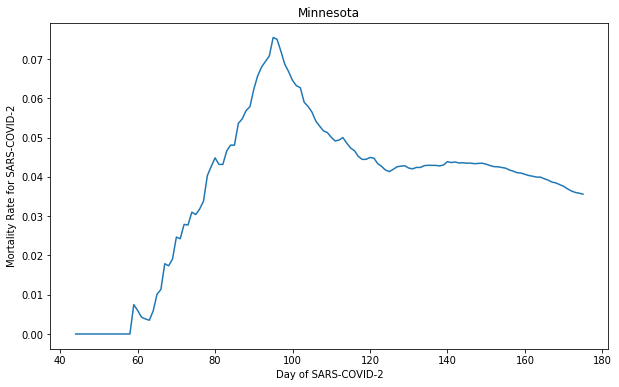

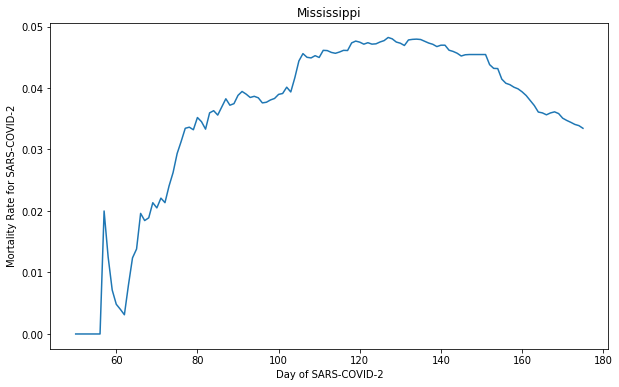

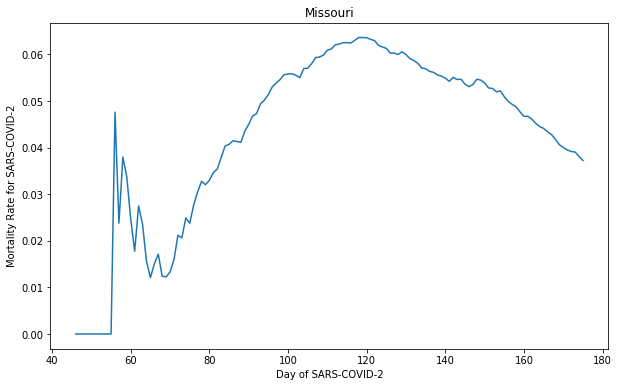

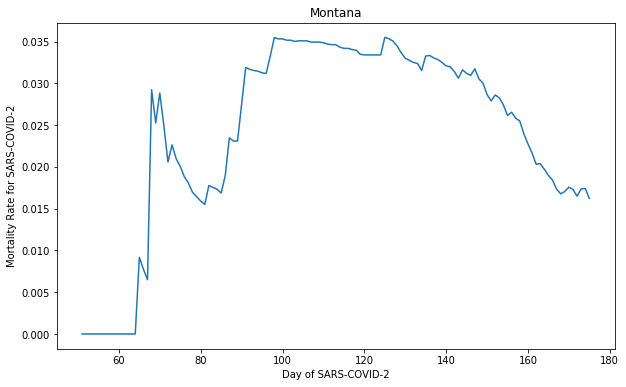

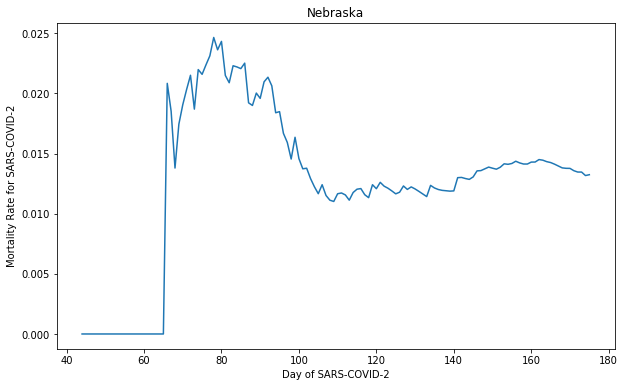

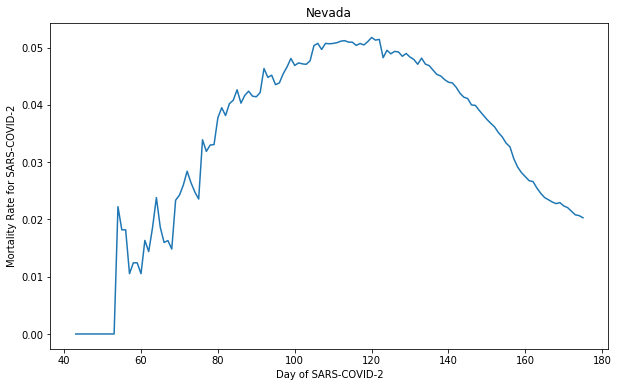

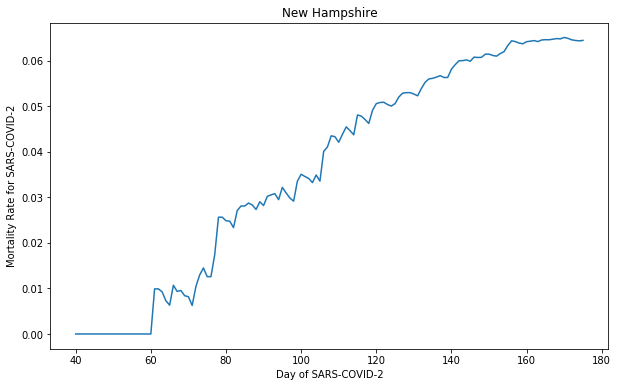

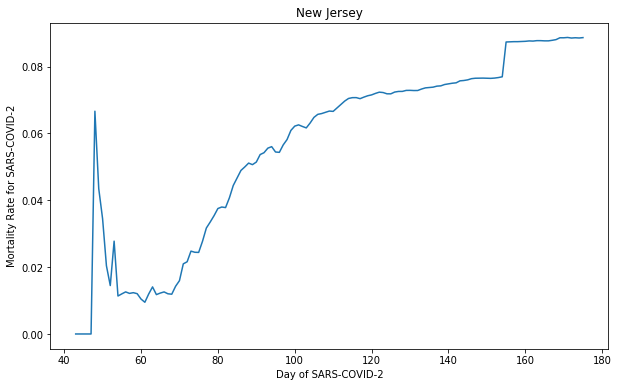

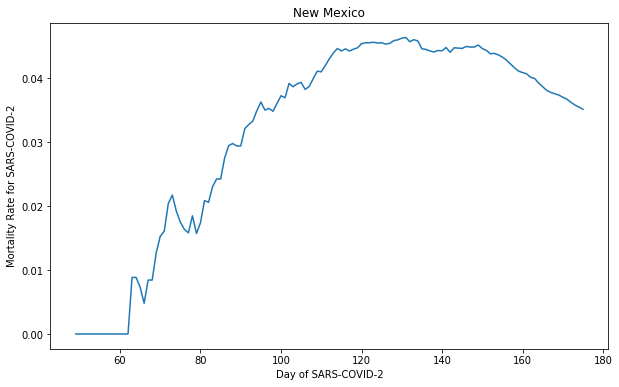

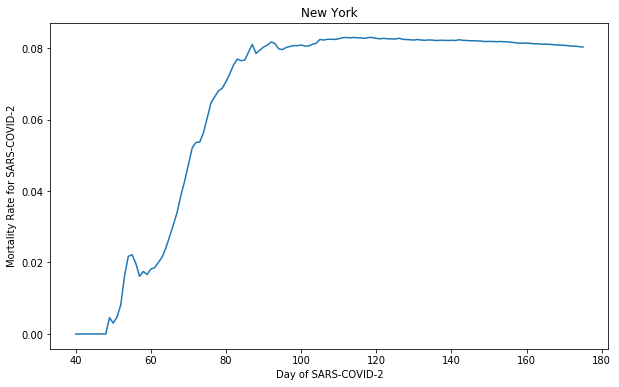

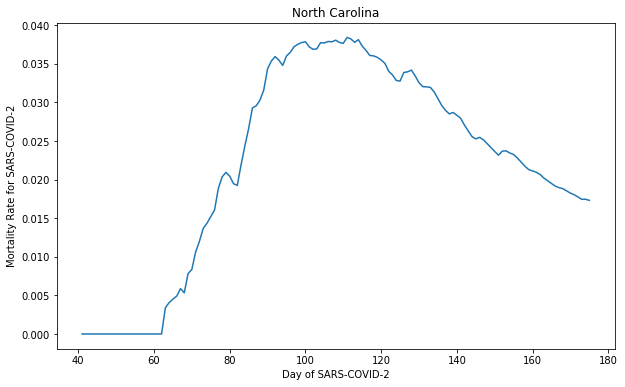

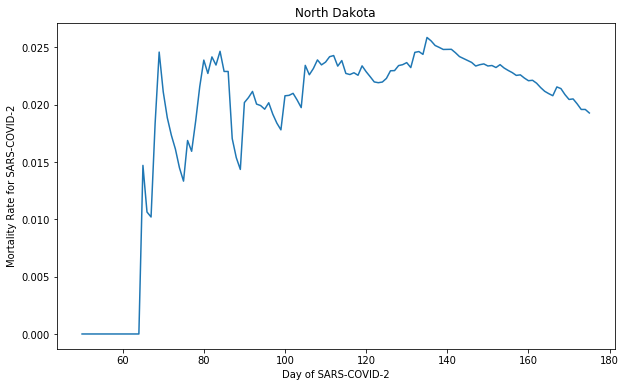

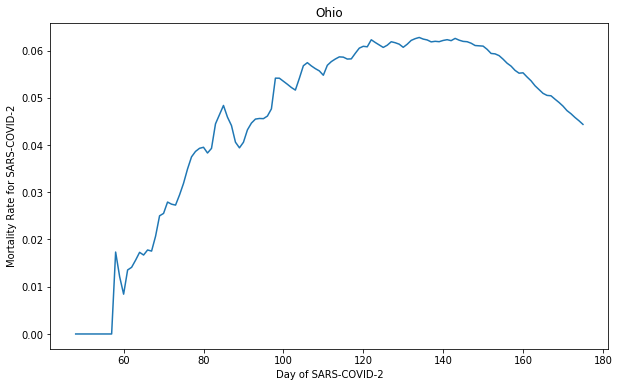

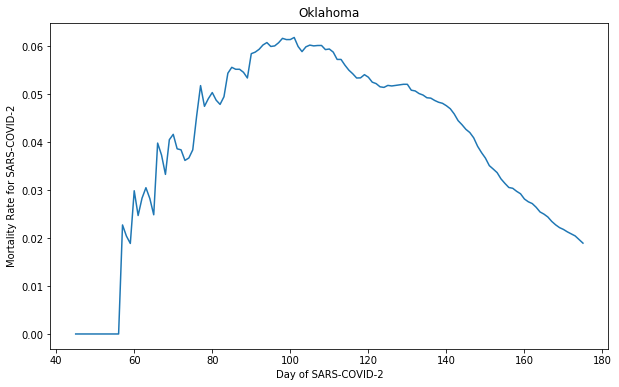

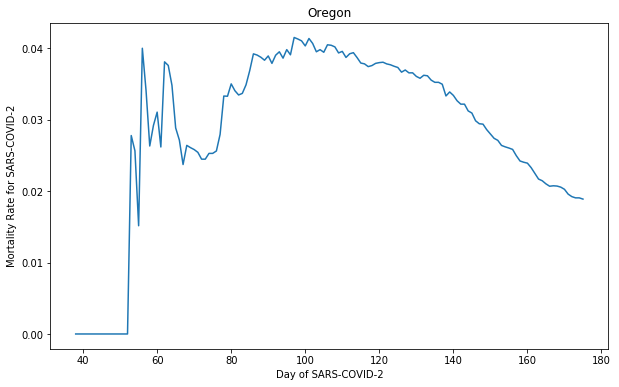

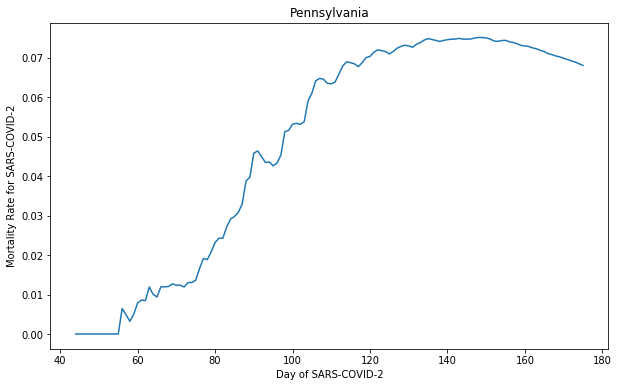

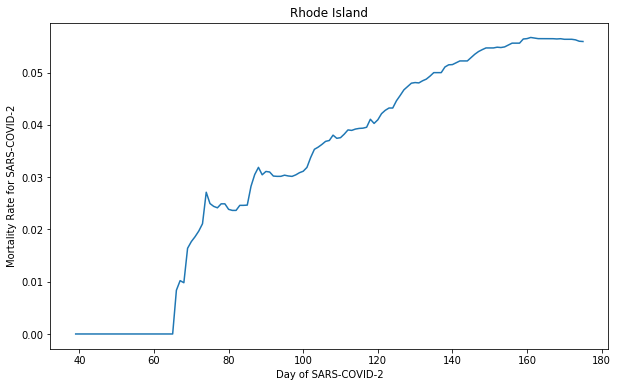

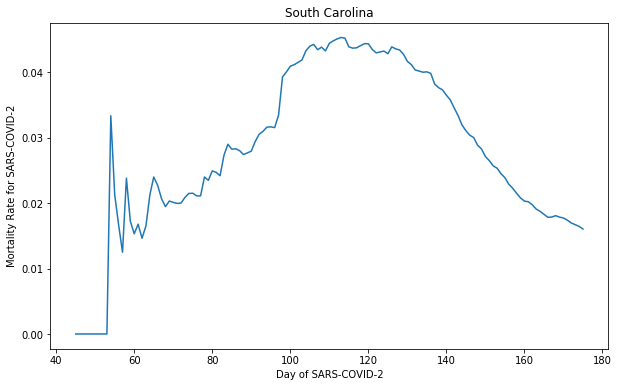

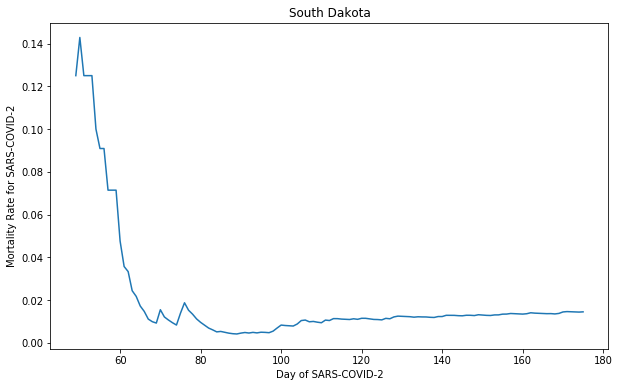

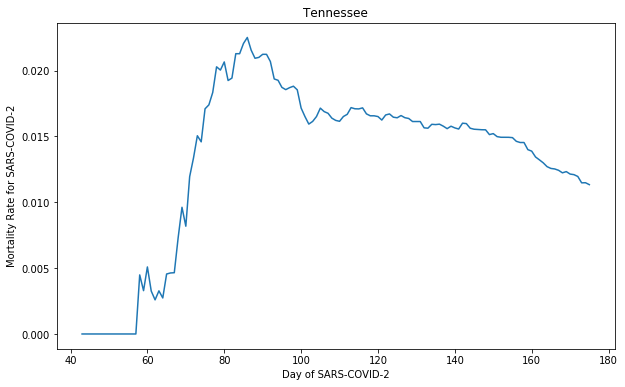

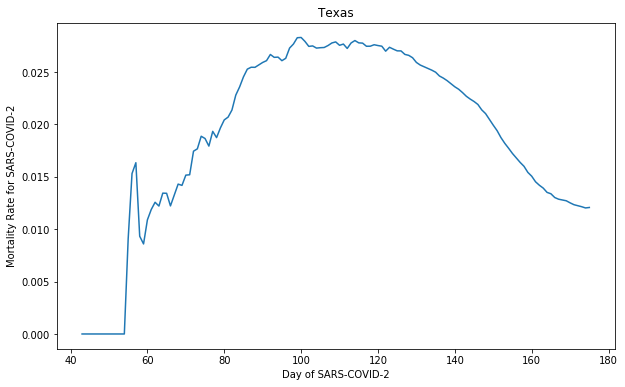

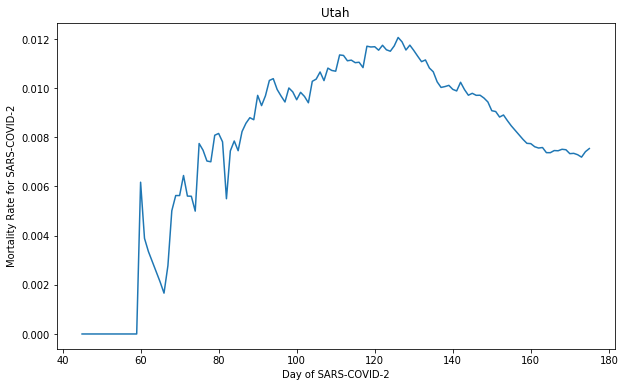

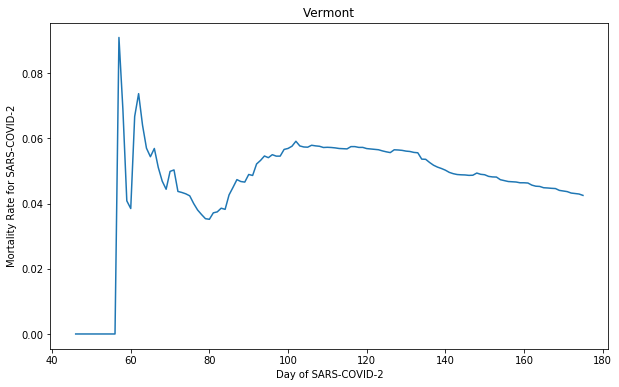

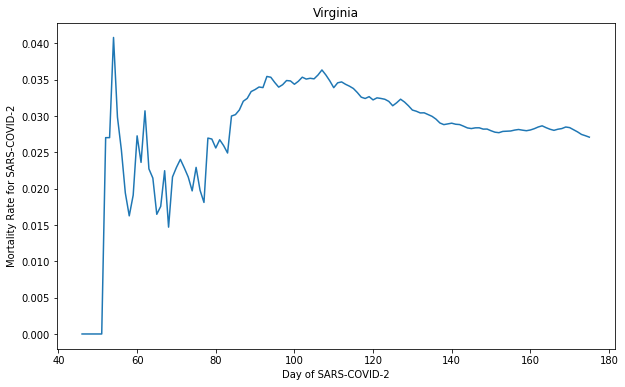

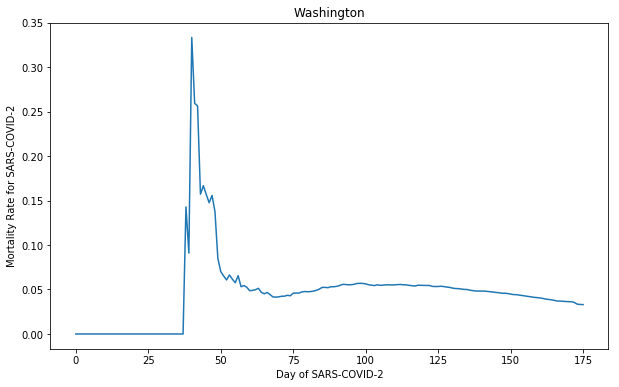

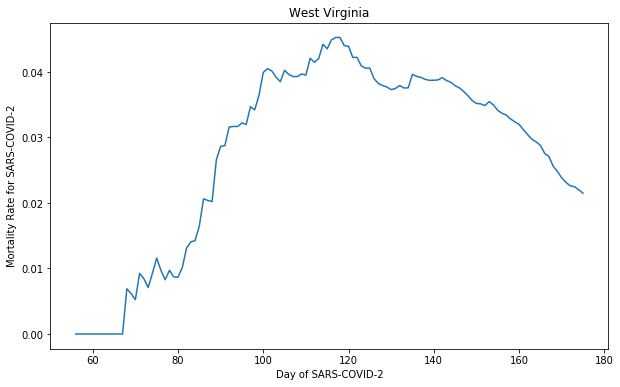

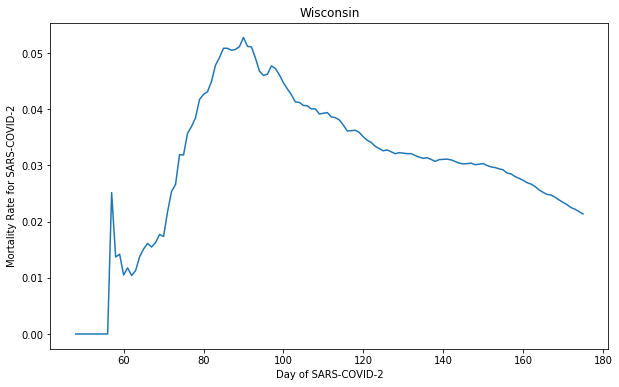

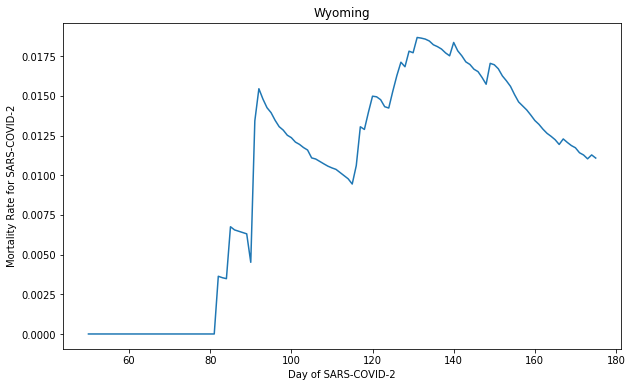

In [70]:
plotRateOfDeathsByState()

In [97]:
int(int(us.states.AL.fips)/10)

0